In [1]:
#Import all required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [2]:
#Read the csv dataset

df = pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
#Information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
#Description of the dataset

df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
#Prepare the Data

X = df.drop(['Drug'], axis=1)
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [6]:
#Prepare the Target

y = df['Drug']
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [7]:
#Encode all the non-number data

oe = OrdinalEncoder(categories=[X['Sex'].unique(), X['BP'].unique(), X['Cholesterol'].unique()], dtype=np.int)
le = LabelEncoder()

X_encoded = oe.fit_transform(X[['Sex', 'BP', 'Cholesterol']])
y_encoded = le.fit_transform(y)

In [8]:
#Assign the encoded data to the correspond column in dataframe

X['Sex'], X['BP'], X['Cholesterol'] = X_encoded[:,0], X_encoded[:,1], X_encoded[:,2]
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [9]:
#Look the y_encoded variable

y_encoded

array([4, 2, 2, 3, 4, 3, 4, 2, 4, 4, 2, 4, 4, 4, 3, 4, 3, 0, 2, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 3, 1, 3, 4, 3, 3, 0, 3, 3, 3, 4, 1, 4, 3,
       3, 3, 0, 2, 4, 4, 4, 3, 4, 4, 1, 2, 1, 4, 3, 4, 4, 0, 4, 3, 1, 4,
       0, 3, 4, 4, 1, 4, 3, 4, 4, 4, 0, 4, 0, 3, 1, 3, 2, 0, 2, 1, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 0, 0, 2, 3, 4, 3, 3, 4, 1, 4,
       0, 3, 3, 3, 3, 4, 3, 3, 0, 4, 4, 4, 4, 4, 1, 4, 4, 3, 4, 3, 4, 4,
       3, 4, 4, 3, 1, 0, 1, 3, 0, 4, 1, 4, 0, 3, 3, 0, 3, 2, 0, 1, 3, 3,
       4, 2, 0, 4, 2, 3, 3, 1, 3, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 4, 0, 4,
       0, 4, 4, 4, 4, 3, 3, 4, 4, 4, 1, 0, 4, 4, 4, 0, 4, 2, 4, 2, 2, 3,
       3, 3])

In [10]:
#Split the data into 80% of train and 20% of

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, train_size=0.8, random_state=23)

In [11]:
#Fit the model

model = DecisionTreeClassifier()
model.fit(X_train.values, y_train)

DecisionTreeClassifier()

In [12]:
#Test the model with test data | #Predict test data and and accuracy score

print(model.score(X_test.values, y_test))

test_predicted = model.predict(X_test.values)
print('Accuracy score for test data is: ', accuracy_score(y_test, test_predicted))

1.0
Accuracy score for test data is:  1.0


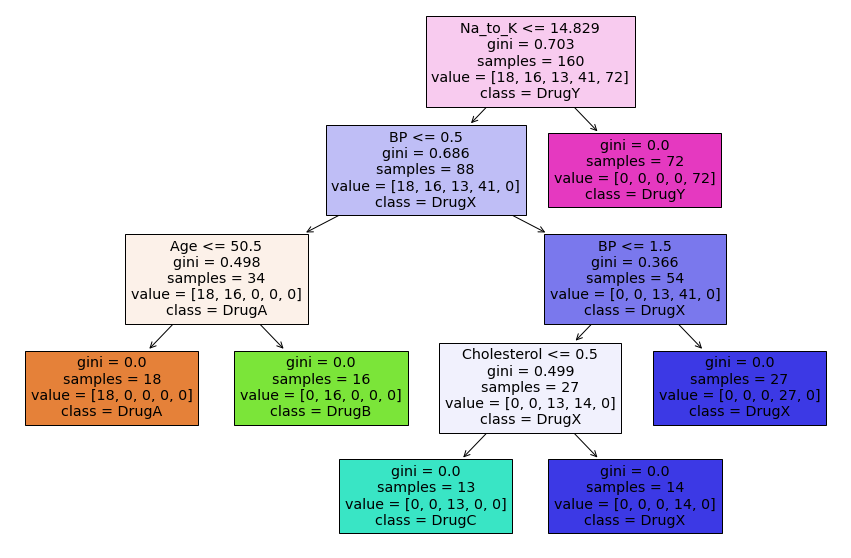

In [13]:
#Plot the Decision Tree

fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(model, feature_names=X.columns, class_names=['DrugA', 'DrugB', 'DrugC', 'DrugX', 'DrugY'], filled=True)

Text(0.5, 1.0, 'Confusion Matrix of Decision Tree using Drugs Dataset')

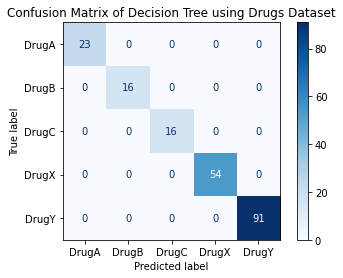

In [14]:
#Display the Confusion Matrix

disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X.values,
        y_encoded,
        display_labels=['DrugA', 'DrugB', 'DrugC', 'DrugX', 'DrugY'],
        cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix of Decision Tree using Drugs Dataset')

In [15]:
# Predict new data (Age = 22; Sex = M; BP = Normal; Cholesterol = Normal; 
#                   Na_to_K = 15.7)

predicted = model.predict([[22, 1, 2, 1, 15.7]])
predicted

array([4])

In [16]:
#Inverse transform the predicted value

predicted_unencode = le.inverse_transform(predicted)
predicted_unencode

array(['drugY'], dtype=object)